<pre>
1. Download all the data in this folder https://drive.google.com/open?id=1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu. it contains two file both images and labels. The label file list the images and their categories in the following format:
            <b>path/to/the/image.tif,category</b>
            
    where the categories are numbered 0 to 15, in the following order:

    <b>0 letter
    1 form
    2 email
    3 handwritten
    4 advertisement
    5 scientific report
    6 scientific publication
    7 specification
    8 file folder
    9 news article
    10 budget
    11 invoice
    12 presentation
    13 questionnaire
    14 resume
    15 memo</b>
    
2. On this image data, you have to train 3 types of models as given below. You have to split the data into Train and Validation data.

3. Try not to load all the images into memory, use the gernarators that we have given the reference notebooks to load the batch of images only during the train data.
or you can use this method also
<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1</a>

<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c</a>


4. You are free to choose Learning rate, optimizer, loss function, image augmentation, any hyperparameters. but you have to use the same architechture what we are asking below. 

5. Use tensorboard for every model and analyse your gradients. (you need to upload the screenshots for each model for evaluation)

Note: fit_genarator() method will have problems with the tensorboard histograms, try to debug it, if you could not do use histgrams=0 i.e don't include histograms, check the documentation of tensorboard for more information. 

6. You can check about Transfer Learning in this link - <a href='https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html'>https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html</a>
</pre>

### Model-1

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights. 
2. After VGG-16 network without FC layers, add a new Conv block ( 1 Conv layer and 1 Maxpooling ), 2 FC layers and a output layer to classify 16 classes. You are free to choose any hyperparameters/parameters of conv block, FC layers, output layer. 
3. Final architecture will be <b>INPUT --> VGG-16 without Top layers(FC) --> Conv Layer --> Maxpool Layer --> 2 FC layers --> Output Layer</b>
4. Train only new Conv block, FC layers, output layer. Don't train the VGG-16 network. 

</pre>

### Model-2

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights.
2. After VGG-16 network without FC layers, don't use FC layers, use conv layers only as Fully connected layer. any FC layer can be converted to a CONV layer. This conversion will reduce the No of Trainable parameters in FC layers. For example, an FC layer with K=4096 that is looking at some input volume of size 7×7×512 can be equivalently expressed as a CONV layer with F=7,P=0,S=1,K=4096. In other words, we are setting the filter size to be exactly the size of the input volume, and hence the output will simply be 1×1×4096 since only a single depth column “fits” across the input volume, giving identical result as the initial FC layer. You can refer <a href='http://cs231n.github.io/convolutional-networks/#convert'>this</a> link to better understanding of using Conv layer in place of fully connected layers.
3. Final architecture will be VGG-16 without FC layers(without top), 2 Conv layers identical to FC layers, 1 output layer for 16 class classification. <b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>
3. Train only last 2 Conv layers identical to FC layers, 1 output layer. Don't train the VGG-16 network. 
</pre>

### Model-3

<pre>
1. Use same network as Model-2 '<b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>' and train only Last 6 Layers of VGG-16 network, 2 Conv layers identical to FC layers, 1 output layer.
</pre>

In [1]:
import tensorflow as tf
#import openCV
import cv2
import os
import numpy as np
import pandas as pd

In [2]:
tf.__version__

'2.2.0'

In [3]:
dir_path = os.path.join(os.getcwd(),'data_final')

In [4]:
read_data_csv = pd.read_csv("labels_final.csv")
read_data_csv.head()

,path,label
0,imagesv/v/o/h/voh71d00/509132755+-2755.tif,3
1,imagesl/l/x/t/lxt19d00/502213303.tif,3
2,imagesx/x/e/d/xed05a00/2075325674.tif,2
3,imageso/o/j/b/ojb60d00/517511301+-1301.tif,3
4,imagesq/q/z/k/qzk17e00/2031320195.tif,7


In [5]:
print("Number of Images {}".format(read_data_csv.shape[0]))

Number of Images 48000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

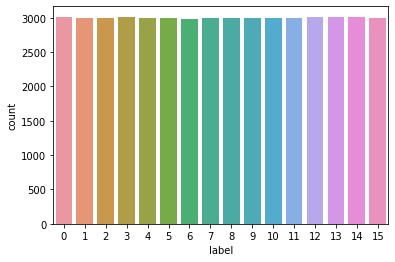

In [7]:
sns.countplot(read_data_csv['label'])

In [8]:
dir_path = os.path.join(os.getcwd(),"data_final")

In [9]:
dir_path

'C:\\Users\\shubh\\Desktop\\19_Trasfer Learning\\data_final'

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np

In [11]:
img_df=pd.read_csv('labels_final.csv',dtype=str)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
img_df = shuffle(img_df)

In [13]:
train_df = img_df.iloc[0:int(0.8*img_df.shape[0]),:]
test_df =  img_df.iloc[int(0.8*img_df.shape[0]):,:]

In [14]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)
train_generator=datagen.flow_from_dataframe(
                                        dataframe=train_df,
                                        directory='data_final/',
                                        x_col="path",
                                        y_col="label",
                                        subset="training",
                                        batch_size=32,
                                        seed=42,
                                        shuffle=True,
                                        class_mode="categorical",
                                        target_size=(224,224))

valid_generator=datagen.flow_from_dataframe(
                                        dataframe=train_df,
                                        directory='data_final/',
                                        x_col="path",
                                        y_col="label",
                                        subset="validation",
                                        batch_size=32,
                                        seed=42,
                                        shuffle=True,
                                        class_mode="categorical",
                                        target_size=(224,224))

test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
                                        dataframe=test_df,
                                        directory='data_final/',
                                        x_col="path",
                                        y_col=None,
                                        batch_size=32,
                                        seed=42,
                                        shuffle=False,
                                        class_mode=None,
                                        target_size=(224,224))

Found 28800 validated image filenames belonging to 16 classes.
Found 9600 validated image filenames belonging to 16 classes.
Found 9600 validated image filenames.


In [15]:
from tensorflow.keras.applications.vgg16 import VGG16

In [16]:
tf.keras.backend.clear_session()
input_layer = Input(shape=(224,224,3),name='Input_Layer')

vggnet = VGG16(input_shape=(224,224,3),weights='imagenet', include_top=False)
for layer in vggnet.layers[:]:
    layer.trainable = False

vggnet_conv = vggnet(input_layer)
Conv1 = Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv1')(vggnet_conv)
Pool1 = MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',name='Pool1')(Conv1)
#Flatten
flatten = Flatten(data_format='channels_last',name='Flatten')(Pool1)
#FC layer
FC1 = Dense(units=128,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC1')(flatten)
#FC layer
FC2 = Dense(units=64,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=33),name='FC2')(FC1)
#output layer
Out = Dense(units=16,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(FC2)
#Creating a model
model = Model(inputs=input_layer,outputs=Out)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
Conv1 (Conv2D)               (None, 5, 5, 32)          147488    
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 2, 2, 32)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
FC1 (Dense)                  (None, 128)               16512     
_________________________________________________________________
FC2 (Dense)                  (None, 64)                8256  

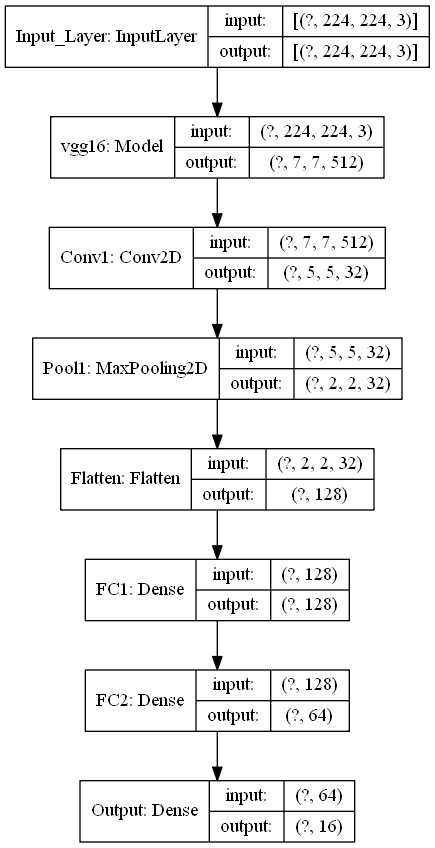

In [18]:
# summarize the model
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

In [19]:
#compiling 
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
##fitting generator
model.fit(train_generator,steps_per_epoch=216,epochs=100,validation_data=valid_generator)

Epoch 1/100
216/216 [==============================] - 432s 2s/step - loss: 2.7655 - accuracy: 0.0742 - val_loss: 2.6075 - val_accuracy: 0.0864
Epoch 2/100
216/216 [==============================] - 330s 2s/step - loss: 2.4527 - accuracy: 0.1793 - val_loss: 2.2302 - val_accuracy: 0.2603
Epoch 3/100
216/216 [==============================] - 397s 2s/step - loss: 2.1942 - accuracy: 0.2724 - val_loss: 2.1240 - val_accuracy: 0.2757
Epoch 4/100
216/216 [==============================] - 359s 2s/step - loss: 2.1118 - accuracy: 0.2895 - val_loss: 2.0651 - val_accuracy: 0.3095
Epoch 5/100
216/216 [==============================] - 324s 2s/step - loss: 2.0443 - accuracy: 0.3177 - val_loss: 2.0024 - val_accuracy: 0.3304
Epoch 6/100
216/216 [==============================] - 236s 1s/step - loss: 2.0062 - accuracy: 0.3312 - val_loss: 1.9925 - val_accuracy: 0.3419
Epoch 7/100
216/216 [==============================] - 236s 1s/step - loss: 1.9928 - accuracy: 0.3404 - val_loss: 1.9623 - val_accuracy:

216/216 [==============================] - 228s 1s/step - loss: 1.7271 - accuracy: 0.4362 - val_loss: 1.8085 - val_accuracy: 0.4181
Epoch 58/100
216/216 [==============================] - 229s 1s/step - loss: 1.7196 - accuracy: 0.4404 - val_loss: 1.7632 - val_accuracy: 0.4285
Epoch 59/100
216/216 [==============================] - 252s 1s/step - loss: 1.6992 - accuracy: 0.4507 - val_loss: 1.7834 - val_accuracy: 0.4246
Epoch 60/100
216/216 [==============================] - 279s 1s/step - loss: 1.7310 - accuracy: 0.4366 - val_loss: 1.7819 - val_accuracy: 0.4288
Epoch 61/100
216/216 [==============================] - 294s 1s/step - loss: 1.7271 - accuracy: 0.4327 - val_loss: 1.8654 - val_accuracy: 0.4097
Epoch 62/100
216/216 [==============================] - 245s 1s/step - loss: 1.7395 - accuracy: 0.4365 - val_loss: 1.7893 - val_accuracy: 0.4205
Epoch 63/100
216/216 [==============================] - 223s 1s/step - loss: 1.7354 - accuracy: 0.4332 - val_loss: 1.7792 - val_accuracy: 0.426